In [0]:
!pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"surendrakumar24","key":"cceea802849fabdb683bc35918781bcf"}'}

In [0]:
! mkdir ~/.kaggle 

In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
 ! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge             COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-05 02:43:46          71785  
roche-data-science-coalition/uncover                          UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          10483  
kwullum/fatal-police-shootings-in-the-us                      Fatal Police Shootings in the US                      1MB  2017-09-22 19:18:21          12617  
yash612/stockmarket-sentiment-dataset                         Stock-Market Sentiment Dataset                      201KB  2020-06-05 19:16:19              0  
sudalairajkumar/daily-temperature-of-major-cities   

In [7]:
! kaggle datasets download -d mlg-ulb/creditcardfraud -p/content

 99% 65.0M/66.0M [00:01<00:00, 55.3MB/s]
100% 66.0M/66.0M [00:01<00:00, 62.0MB/s]


In [8]:
! unzip \*.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',500)


In [0]:
df = pd.read_csv(r'/content/creditcard.csv')

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All the features are in numeric form


Here we will observe the distribution of our classes

In [15]:
classes=df['Class'].value_counts()
frauds = classes[1]
non_frauds = classes[0]
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print('There are {} ({:.3f}%) non-fraudulent transactions and {} ({:.3f}%) fraudulent transactions.'.format(non_frauds, normal_share, frauds, fraud_share))

There are 284315 (99.827%) non-fraudulent transactions and 492 (0.173%) fraudulent transactions.


Text(0.5, 0, 'Class - 0:Non-Fraudulent; 1:Fraudulent')

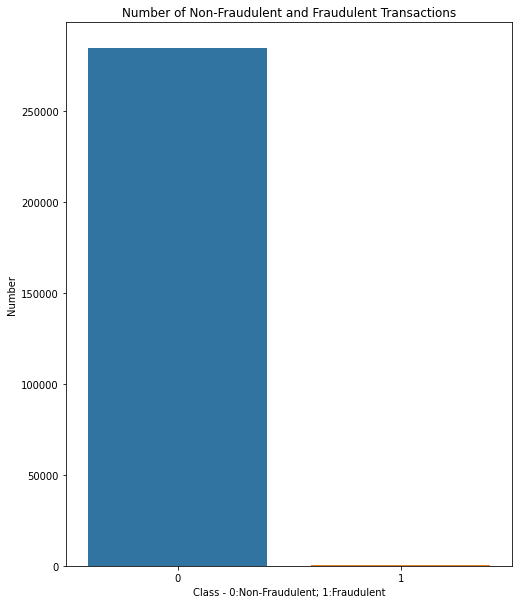

In [16]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(8,10))
sns.barplot(x=classes.index, y=classes)
plt.title('Number of Non-Fraudulent and Fraudulent Transactions')
plt.ylabel('Number')
plt.xlabel('Class - 0:Non-Fraudulent; 1:Fraudulent')

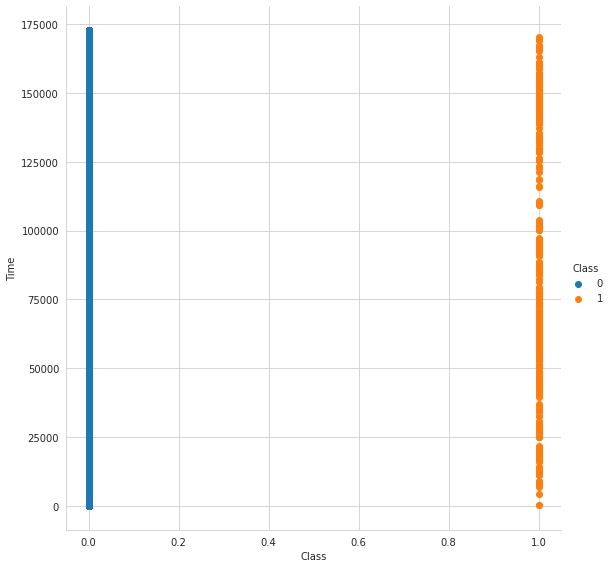

In [17]:
# Create a scatter plot to observe the distribution of classes with time
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", size = 8).map(plt.scatter, "Class", "Time").add_legend()
plt.show()

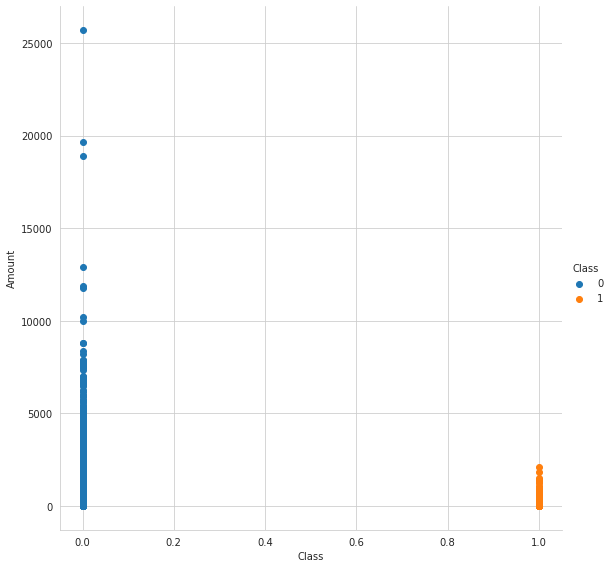

In [18]:
# Create a scatter plot to observe the distribution of classes with Amount

sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", size = 8).map(plt.scatter,  "Class","Amount").add_legend()
plt.show()